In [10]:
data("case0402", package = "Sleuth2")

# Setting seed for reproducibility.
set.seed(123)

In [11]:
# Loading libraries
library(knitr)
library(crayon)
library(ggplot2)

cat("\n")
cat(bold("Displaying the first few rows of data:"))
kable(head(case0402), format = "simple")
cat("\n")



Displaying the first few rows of data:



 Time  Treatmt     Censor
-----  ---------  -------
   68  Modified         0
   70  Modified         0
   73  Modified         0
   75  Modified         0
   77  Modified         0
   80  Modified         0


Data Structure:
'data.frame':	28 obs. of  3 variables:
 $ Time   : num  68 70 73 75 77 80 80 132 148 155 ...
 $ Treatmt: Factor w/ 2 levels "Modified","Conventional": 1 1 1 1 1 1 1 1 1 1 ...
 $ Censor : num  0 0 0 0 0 0 0 0 0 0 ...

Data Sample:




| Time | Treatmt  | Censor |
|:----:|:--------:|:------:|
|  68  | Modified |   0    |
|  70  | Modified |   0    |
|  73  | Modified |   0    |
|  75  | Modified |   0    |
|  77  | Modified |   0    |
|  80  | Modified |   0    |


Summary Overview of Data:




|Var1 |Var2    |Freq            |
|:----|:-------|:---------------|
|     |Time    |Min.   : 68.0   |
|     |Time    |1st Qu.:117.5   |
|     |Time    |Median :158.0   |
|     |Time    |Mean   :174.7   |
|     |Time    |3rd Qu.:231.5   |
|     |Time    |Max.   :300.0   |
|     |Treatmt |Modified    :14 |
|     |Treatmt |Conventional:14 |
|     |Treatmt |NA              |
|     |Treatmt |NA              |
|     |Treatmt |NA              |
|     |Treatmt |NA              |
|     |Censor  |Min.   :0.0000  |
|     |Censor  |1st Qu.:0.0000  |
|     |Censor  |Median :0.0000  |
|     |Censor  |Mean   :0.1786  |
|     |Censor  |3rd Qu.:0.0000  |
|     |Censor  |Max.   :1.0000  |


Visualization of Graphs:


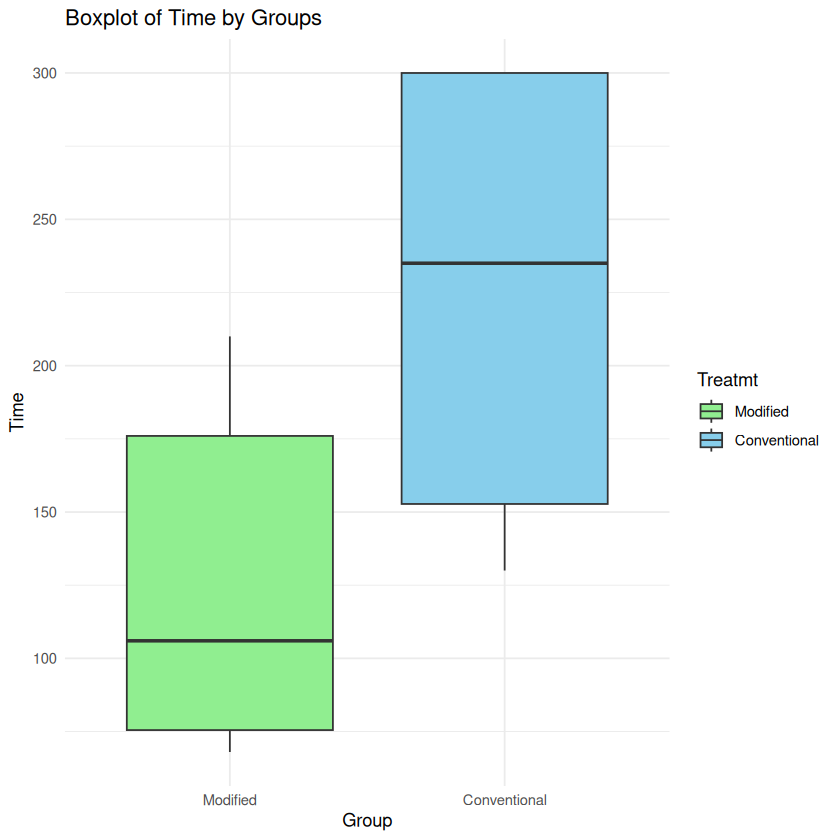

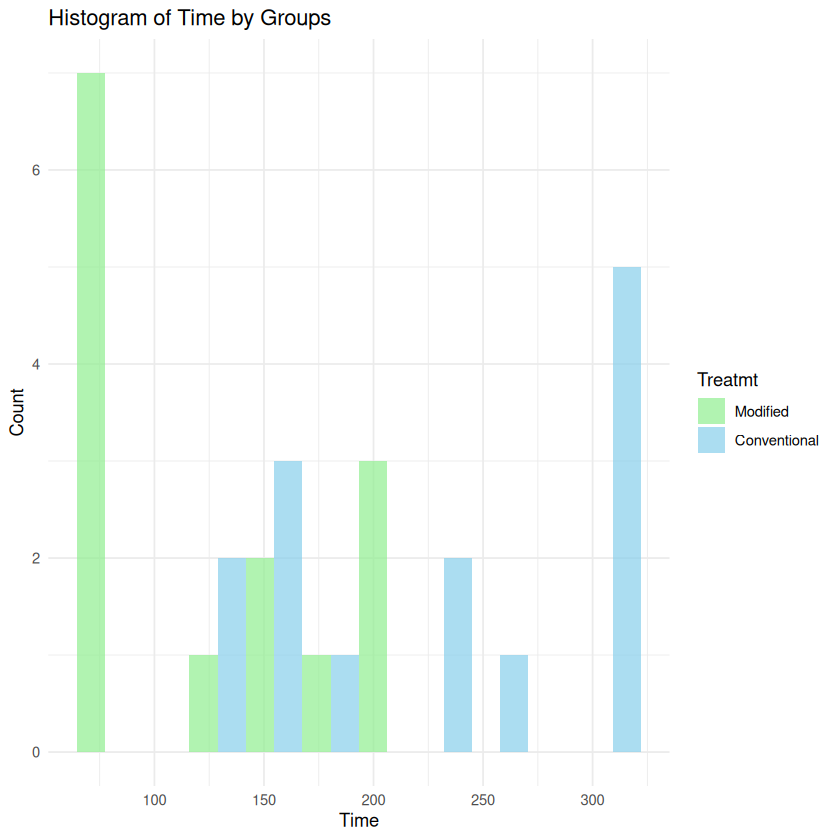

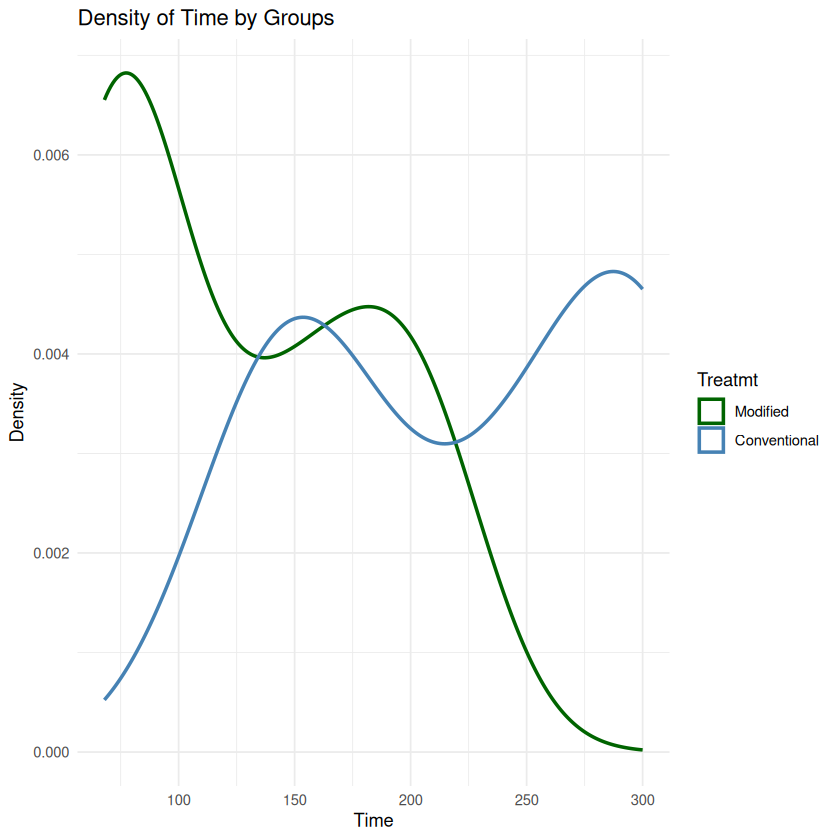

In [12]:
# Displaying the structure of the data
cat("\n")
cat(bold("Data Structure:\n"))
str(case0402)

# Table of the first rows of data in a nicer format
cat(bold("\nData Sample:\n"))
kable(head(case0402), format = "pipe", align = "c")  # The 'pipe' format improves readability

# Summary overview of the data
cat(bold("\nSummary Overview of Data:\n"))
summary_table <- as.data.frame(summary(case0402))  # Convert to a table
kable(summary_table, format = "pipe", align = "l")  # Table formatting

cat(bold("\nVisualization of Graphs:\n"))

# Boxplot by groups
ggplot(case0402, aes(x = Treatmt, y = Time, fill = Treatmt)) +
  geom_boxplot() +
  scale_fill_manual(values = c("Modified" = "lightgreen", "Conventional" = "skyblue")) +
  labs(title = "Boxplot of Time by Groups",
       x = "Group",
       y = "Time") +
  theme_minimal()

# Histograms for individual groups
ggplot(case0402, aes(x = Time, fill = Treatmt)) +
  geom_histogram(position = "dodge", bins = 10, alpha = 0.7) +
  scale_fill_manual(values = c("Modified" = "lightgreen", "Conventional" = "skyblue")) +
  labs(title = "Histogram of Time by Groups",
       x = "Time",
       y = "Count") +
  theme_minimal()

# Density plot by groups
ggplot(case0402, aes(x = Time, color = Treatmt)) +
  geom_density(linewidth = 1) +  # Using linewidth instead of size
  scale_color_manual(values = c("Modified" = "darkgreen", "Conventional" = "steelblue")) +
  labs(title = "Density of Time by Groups",
       x = "Time",
       y = "Density") +
  theme_minimal()


In [13]:
library(ggplot2)

# Splitting into two groups based on the 'Treatmt' column
group1 <- subset(case0402, Treatmt == "Modified")  # First group
group2 <- subset(case0402, Treatmt == "Conventional")  # Second group

# Calculations for group 1
mean1 <- mean(group1$Time)  # Mean
var1 <- var(group1$Time)    # Variance
median1 <- median(group1$Time)  # Median

# Calculations for group 2
mean2 <- mean(group2$Time)
var2 <- var(group2$Time)
median2 <- median(group2$Time)

# Dynamic output with description for group 1
cat(bold("\nResults for the first group (Modified):"))
cat("\n- Mean:", mean1, "\n")
cat("- Variance:", var1, "\n")
cat("- Median:", median1, "\n\n")

# Dynamic output with description for group 2
cat(bold("Results for the second group (Conventional):"))
cat("\n- Mean:", mean2, "\n")
cat("- Variance:", var2, "\n")
cat("- Median:", median2, "\n\n")



Results for the first group (Modified):
- Mean: 125.2857 
- Variance: 3203.297 
- Median: 106 

Results for the second group (Conventional):
- Mean: 224.1429 
- Variance: 4976.901 
- Median: 235 



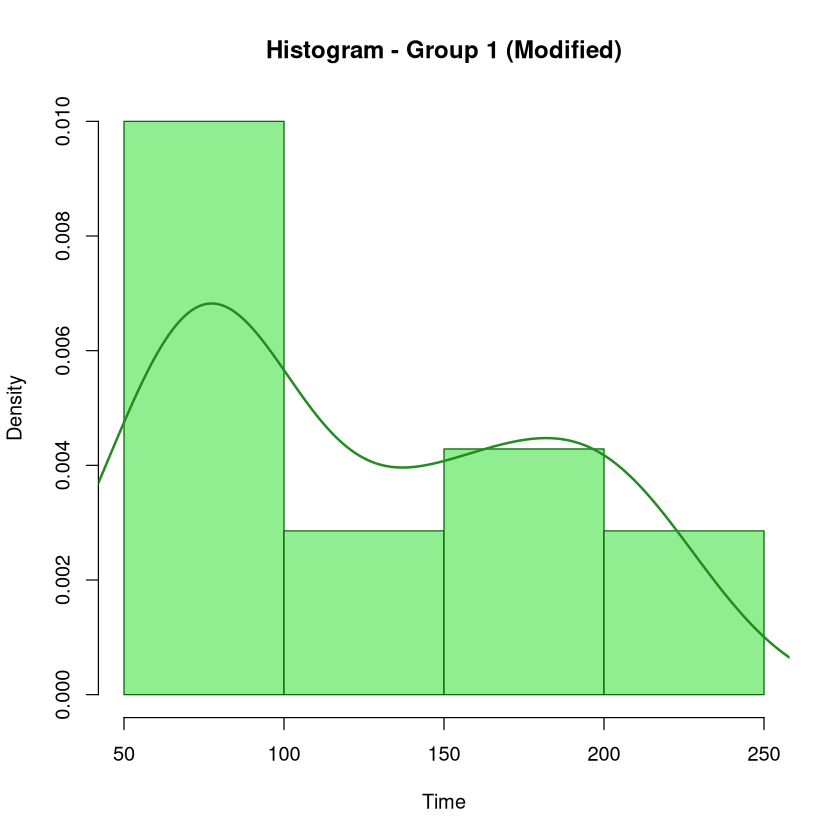

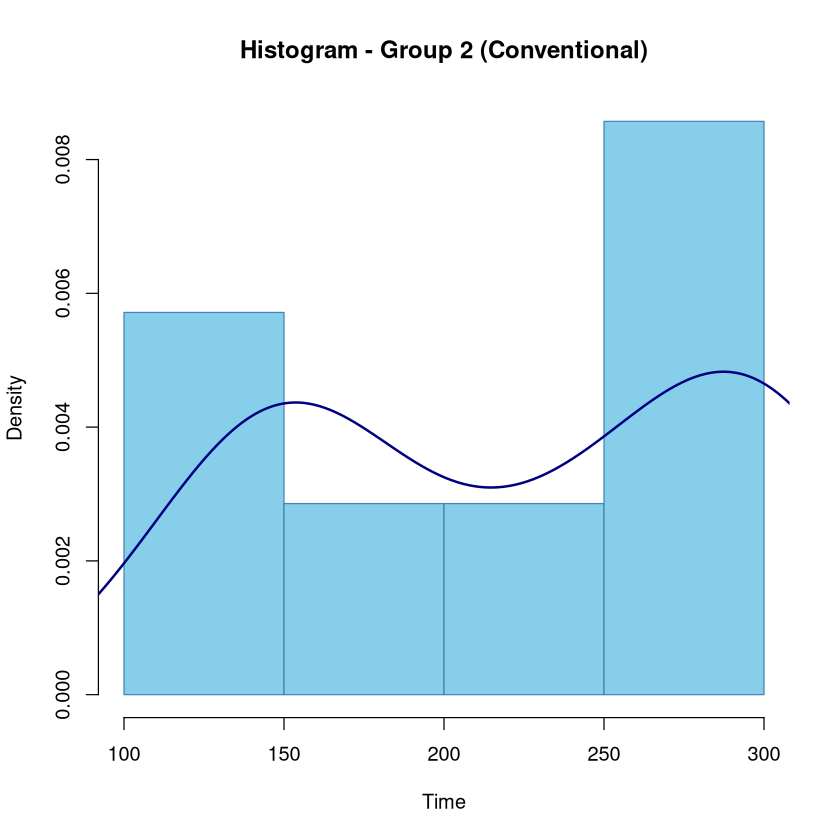

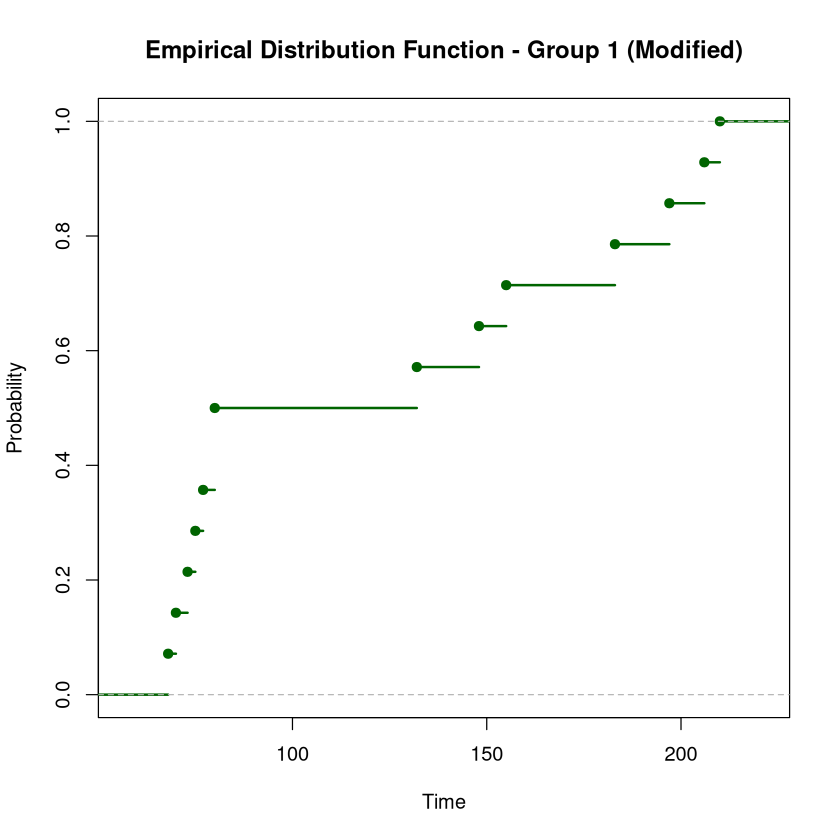

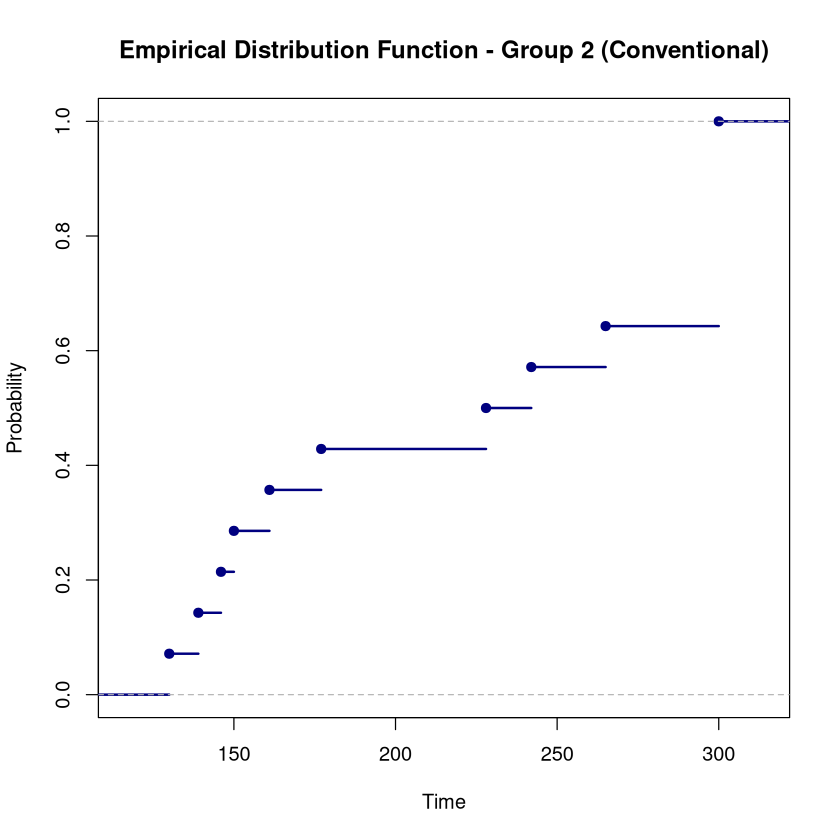

In [14]:
# Loading the data file
data("case0402", package = "Sleuth2")

# Splitting into two groups based on the 'Treatmt' column
group1 <- subset(case0402, Treatmt == "Modified")  # Group 1
group2 <- subset(case0402, Treatmt == "Conventional")  # Group 2

# Plotting histogram for group 1
hist(
  group1$Time,
  main = "Histogram - Group 1 (Modified)",
  xlab = "Time",
  ylab = "Density", 
  col = "lightgreen",  # Fill color
  border = "darkgreen",  # Border color
  freq = FALSE # Setting for density instead of frequency
)
lines(density(group1$Time), col = "forestgreen", lwd = 2) # Density curve

# Plotting histogram for group 2
hist(
  group2$Time,
  main = "Histogram - Group 2 (Conventional)",
  xlab = "Time",
  ylab = "Density", 
  col = "skyblue",  # Fill color
  border = "steelblue",  # Border color
  freq = FALSE
)
lines(density(group2$Time), col = "navy", lwd = 2) # Density curve

# Empirical distribution function for group 1
plot(
  ecdf(group1$Time),
  main = "Empirical Distribution Function - Group 1 (Modified)",
  xlab = "Time",
  ylab = "Probability",
  col = "darkgreen",  
  lwd = 2
)

# Empirical distribution function for group 2
plot(
  ecdf(group2$Time),
  main = "Empirical Distribution Function - Group 2 (Conventional)",
  xlab = "Time",
  ylab = "Probability",
  col = "navy", 
  lwd = 2
)




Explanation of Parameter Estimation for Group 1 (Modified): 
- Normal Distribution: Mean (arithmetic average) and standard deviation calculated directly from the data.
- Exponential Distribution: Lambda (rate) is estimated as 1/mean.
- Uniform Distribution: Min and Max are estimated as the smallest and largest values of the data.

Explanation of Parameter Estimation for Group 1 (Modified): 
- Normal: mean = 125.29 
- Standard Deviation = 56.6 
- Exponential: lambda = 0.01 
- Uniform: min = 68 , max = 210 

Discussion and Reflection for Group 1 (Modified):
After analyzing the graph, it is evident that the data for Group 1 (Modified) better fits an exponential distribution. The shape of the histogram and the exponential density curve indicate an asymmetrical distribution with a higher number of lower time values.



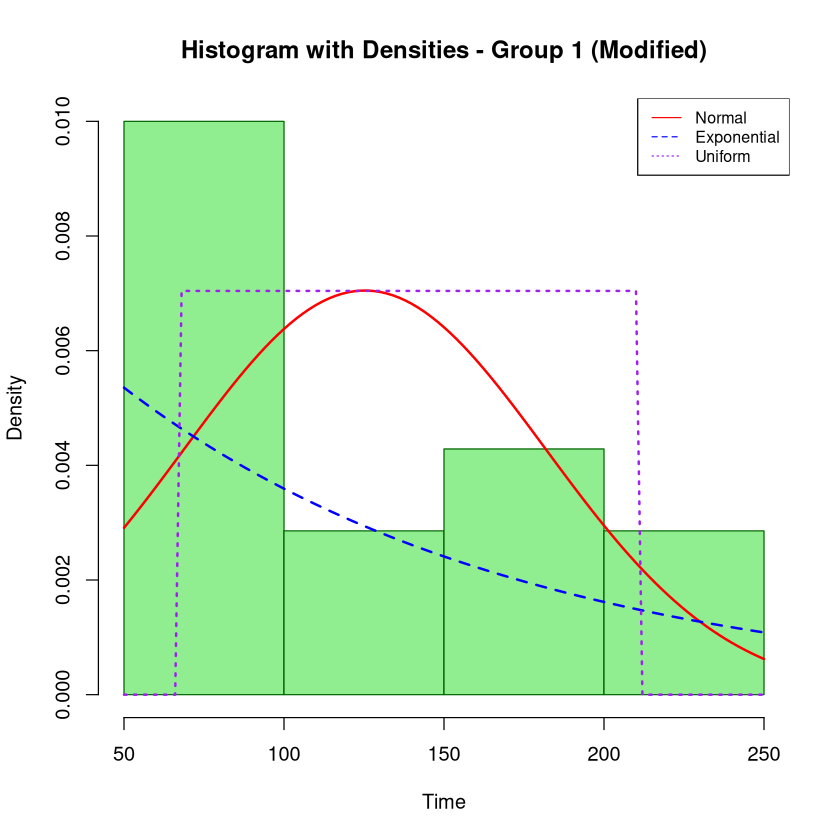


Explanation of Parameter Estimation for Group 2 (Conventional): 
- Normal Distribution: Mean (arithmetic average) and standard deviation calculated directly from the data.
- Exponential Distribution: Lambda (rate) is estimated as 1/mean.
- Uniform Distribution: Min and Max are estimated as the smallest and largest values of the data.

Explanation of Parameter Estimation for Group 2 (Conventional): 
- Normal: mean = 224.14 
- Standard Deviation = 70.55 
- Exponential: lambda = 0 
- Uniform: min = 130 , max = 300 

Discussion and Reflection:
Group 2 (Conventional):
After analyzing the graph, it is clear that the data for Group 2 (Conventional) do not exhibit a clearly fitting distribution. Although the normal distribution (red line) roughly matches the shape of the histogram, differences at the data extremes suggest deviations from the theoretical normal distribution.

However, the exponential distribution (blue line) and the uniform distribution (purple line) do not sufficiently approx

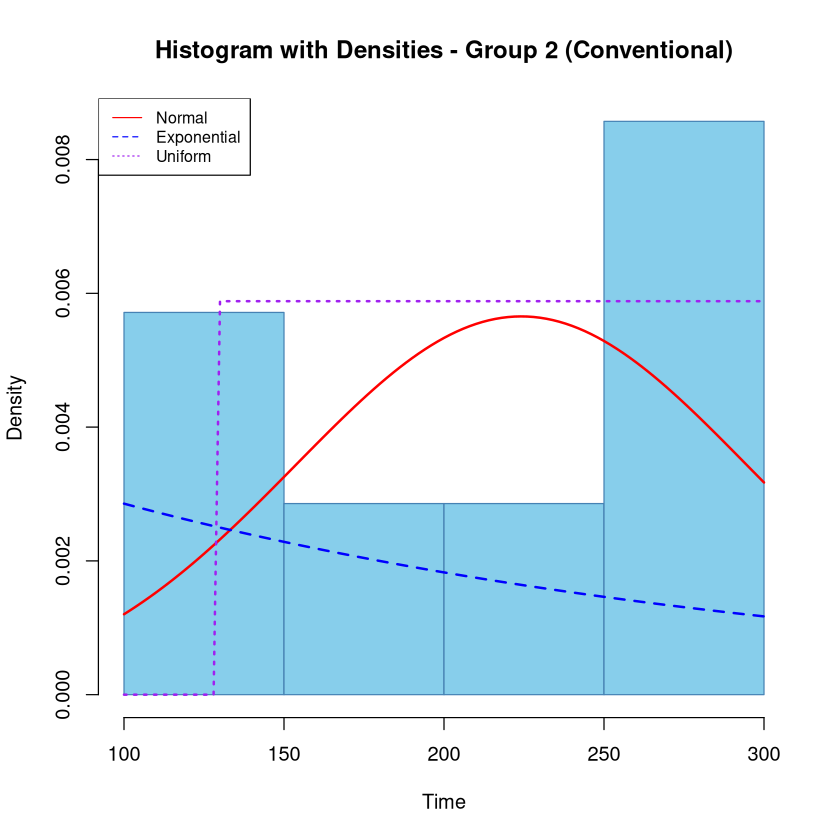

In [19]:
cat("\n")
# Function to plot density with histogram
plot_densities <- function(data, group) {
  # Histogram
  hist(
    data,
    freq = FALSE,
    main = paste("Histogram with Densities -", group),
    xlab = "Time",
    ylab = "Density",
    col = if (group == "Group 1 (Modified)") "lightgreen" else "skyblue",
    border = if (group == "Group 1 (Modified)") "darkgreen" else "steelblue"
  )
  
  # Parameter estimation
  mean_val <- mean(data)  # Mean - estimated as the arithmetic average of the data
  sd_val <- sd(data)      # Standard deviation - calculated from the data using the standard sd() function
  lambda_val <- 1 / mean_val  # Exponential parameter - estimated as 1/mean
  min_val <- min(data)    # Minimum for uniform distribution - obtained as the minimum of the data
  max_val <- max(data)    # Maximum for uniform distribution - obtained as the maximum of the data
  
  # Explanation of parameter estimation
  cat(bold(paste0("\nExplanation of Parameter Estimation for ", group, ":")), "\n")
  cat("- Normal Distribution: Mean (arithmetic average) and standard deviation calculated directly from the data.\n")
  cat("- Exponential Distribution: Lambda (rate) is estimated as 1/mean.\n")
  cat("- Uniform Distribution: Min and Max are estimated as the smallest and largest values of the data.\n\n")
  
  # Normal density
  curve(dnorm(x, mean = mean_val, sd = sd_val),
        col = "red", lwd = 2, add = TRUE, lty = 1)
  
  # Exponential density
  curve(dexp(x, rate = lambda_val),
        col = "blue", lwd = 2, add = TRUE, lty = 2)
  
  # Uniform density
  curve(dunif(x, min = min_val, max = max_val),
        col = "purple", lwd = 2, add = TRUE, lty = 3)
  
  # Legend
  legend_position <- if (group == "Group 1 (Modified)") "topright" else "topleft"
  legend(legend_position, legend = c("Normal", "Exponential", "Uniform"),
         col = c("red", "blue", "purple"), lty = 1:3, cex = 0.8)

  # Displaying parameters
  cat(bold(paste0("Explanation of Parameter Estimation for ", group, ":")), "\n")
  cat("- Normal: mean =", round(mean_val, 2), "\n")
  cat("- Standard Deviation =", round(sd_val, 2), "\n")
  cat("- Exponential: lambda =", round(lambda_val, 2), "\n")
  cat("- Uniform: min =", round(min_val, 2), ", max =", round(max_val, 2), "\n\n")
  
  # Discussion for individual groups
  if (group == "Group 1 (Modified)") {
    cat(bold("Discussion and Reflection for Group 1 (Modified):"))
    cat("\nAfter analyzing the graph, it is evident that the data for Group 1 (Modified) better fits an exponential distribution. The shape of the histogram and the exponential density curve indicate an asymmetrical distribution with a higher number of lower time values.\n\n")
  } else if (group == "Group 2 (Conventional)") {
    cat(bold("Discussion and Reflection:"))
    cat("\nGroup 2 (Conventional):\n")
    cat("After analyzing the graph, it is clear that the data for Group 2 (Conventional) do not exhibit a clearly fitting distribution. Although the normal distribution (red line) roughly matches the shape of the histogram, differences at the data extremes suggest deviations from the theoretical normal distribution.\n")
    cat("\n")
    cat("However, the exponential distribution (blue line) and the uniform distribution (purple line) do not sufficiently approximate the histogram. Therefore, the normal distribution appears to be the best approximation, albeit with certain reservations. This data group likely requires a more detailed analysis or tests for a more accurate identification of the appropriate distribution model.\n\n")
  }
}

# Plotting for Group 1
plot_densities(group1$Time, "Group 1 (Modified)")

# Plotting for Group 2
plot_densities(group2$Time, "Group 2 (Conventional)")



Numerical Summary for Group 1 (Modified): 

Original Data:
- Minimum: 68 
- First Quartile: 75.5 
- Median: 106 
- Mean: 125.29 
- Third Quartile: 176 
- Maximum: 210 
- Standard Deviation: 56.6 

Simulated Data:
- Minimum: 0.58 
- First Quartile: 39.35 
- Median: 106.21 
- Mean: 131.01 
- Third Quartile: 184.02 
- Maximum: 903.44 
- Standard Deviation: 130.12 



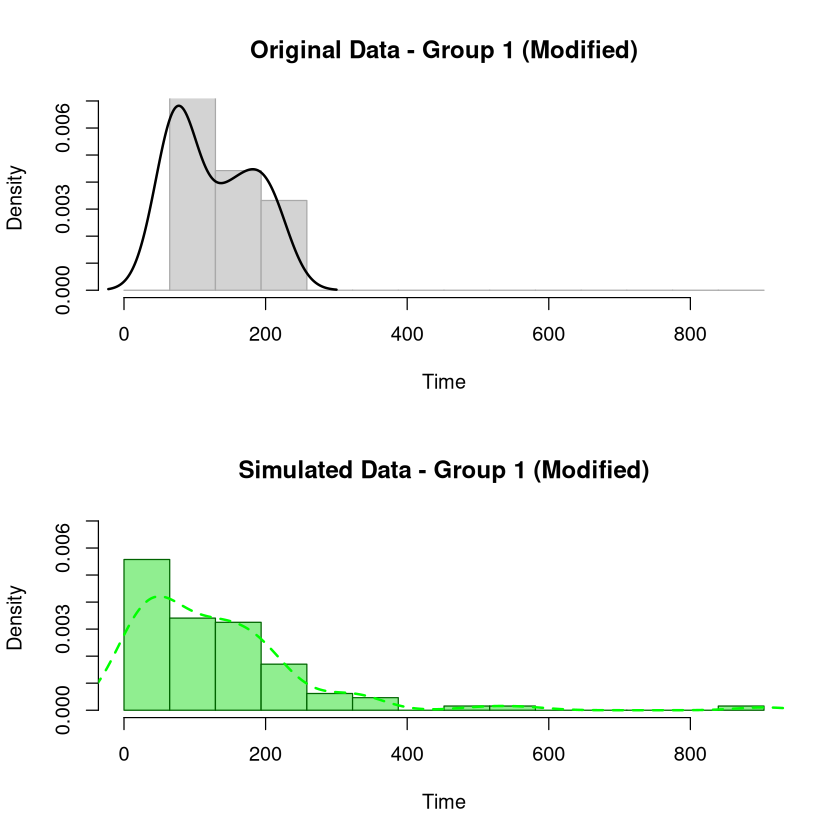


Numerical Summary for Group 2 (Conventional): 

Original Data:
- Minimum: 130 
- First Quartile: 152.75 
- Median: 235 
- Mean: 224.14 
- Third Quartile: 300 
- Maximum: 300 
- Standard Deviation: 70.55 

Simulated Data:
- Minimum: 79.29 
- First Quartile: 177.12 
- Median: 212.97 
- Mean: 222.16 
- Third Quartile: 263.09 
- Maximum: 452.79 
- Standard Deviation: 69.55 

Discussion:
For Group 1 (Modified), an exponential simulation was used. The histogram of the simulated data shows a similar skewness and shape to the original data, with the simulated data having a slightly sharper distribution.
The numerical summary confirms that the mean and median are close, but the standard deviation may differ slightly.

For Group 2 (Conventional), a normal simulation was used. The histogram of the simulated data aligns well with the original data, especially around the mean.
The numerical summary shows that the mean and median of the simulated data are very similar to the original data, confirmi

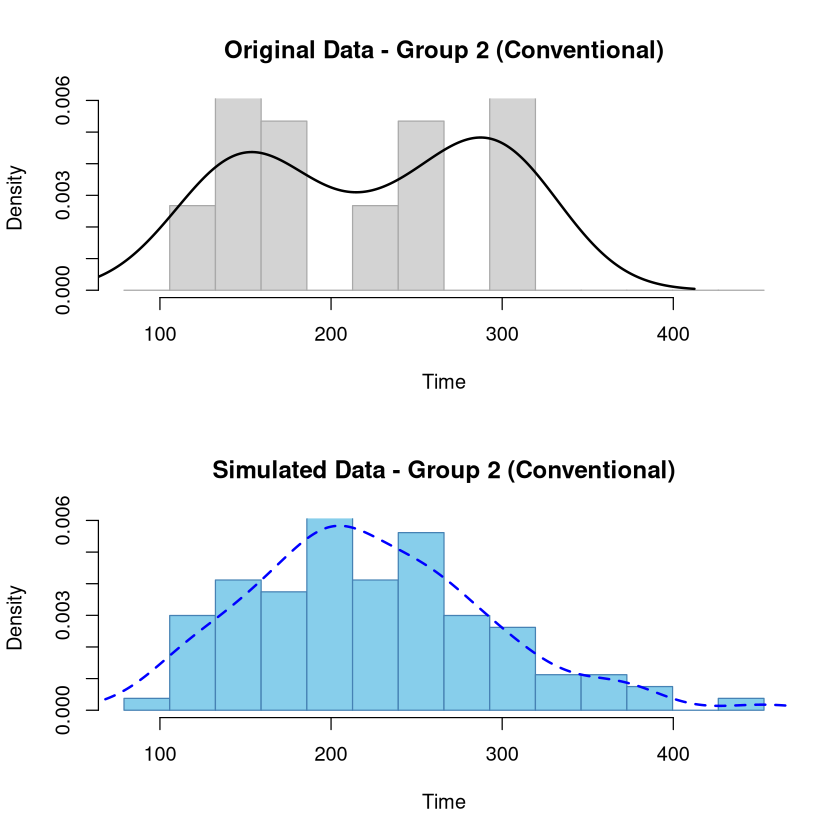

In [16]:
# Function to generate and compare simulated data
compare_histograms_improved <- function(data, simulated_data, group, distribution_type) {
  
  # Define common breaks for both histograms
  breaks_common <- seq(
    floor(min(c(data, simulated_data))),
    ceiling(max(c(data, simulated_data))),
    length.out = 15
  )
  
  # Setting layout for vertically stacked plots
  layout(matrix(c(1, 2), nrow = 2, ncol = 1, byrow = TRUE))  # Plots stacked vertically
  
  # Histogram of original data
  hist(
    data,
    breaks = breaks_common,
    freq = FALSE,
    main = paste("Original Data -", group),
    xlab = "Time",
    ylab = "Density",
    col = "lightgray",  # Fill color
    border = "darkgray",  # Border color
    ylim = c(0, max(density(data)$y, density(simulated_data)$y))
  )
  lines(density(data), col = "black", lwd = 2)  # Density of original data
  
  # Histogram of simulated data
  hist(
    simulated_data,
    breaks = breaks_common,
    freq = FALSE,
    main = paste("Simulated Data -", group),
    xlab = "Time",
    ylab = "Density",
    col = if (distribution_type == "Exponential") "lightgreen" else "skyblue",
    border = if (distribution_type == "Exponential") "darkgreen" else "steelblue",
    ylim = c(0, max(density(data)$y, density(simulated_data)$y))
  )
  lines(density(simulated_data), col = if (distribution_type == "Exponential") "green" else "blue", lwd = 2, lty = 2)  # Density of simulated data
  
  # Resetting layout
  layout(1)
  
  # Numerical summary
  cat("\n")
  cat(bold(paste0("Numerical Summary for ", group, ":")), "\n")
  cat("\n")
          
  cat(bold("Original Data:\n"))
  cat("- Minimum:", round(min(data), 2), "\n")
  cat("- First Quartile:", round(quantile(data, 0.25), 2), "\n")
  cat("- Median:", round(median(data), 2), "\n")
  cat("- Mean:", round(mean(data), 2), "\n") 
  cat("- Third Quartile:", round(quantile(data, 0.75), 2), "\n")
  cat("- Maximum:", round(max(data), 2), "\n")
  cat("- Standard Deviation:", round(sd(data), 2), "\n")
  cat("\n")
          
  cat(bold("Simulated Data:\n"))
  cat("- Minimum:", round(min(simulated_data), 2), "\n")
  cat("- First Quartile:", round(quantile(simulated_data, 0.25), 2), "\n")
  cat("- Median:", round(median(simulated_data), 2), "\n")
  cat("- Mean:", round(mean(simulated_data), 2), "\n")
  cat("- Third Quartile:", round(quantile(simulated_data, 0.75), 2), "\n")
  cat("- Maximum:", round(max(simulated_data), 2), "\n")
  cat("- Standard Deviation:", round(sd(simulated_data), 2), "\n")
  cat("\n")
}


# Generating simulated data and comparison for Group 1 (Modified) - Exponential distribution
lambda1 <- 1 / mean(group1$Time)
simulated_group1 <- rexp(100, rate = lambda1)
compare_histograms_improved(group1$Time, simulated_group1, "Group 1 (Modified)", "Exponential")

# Generating simulated data and comparison for Group 2 (Conventional) - Normal distribution
mean2 <- mean(group2$Time)
sd2 <- sd(group2$Time)
simulated_group2 <- rnorm(100, mean = mean2, sd = sd2)
compare_histograms_improved(group2$Time, simulated_group2, "Group 2 (Conventional)", "Normal")

# Discussion
cat(bold("Discussion:"))
cat("\nFor Group 1 (Modified), an exponential simulation was used. The histogram of the simulated data shows a similar skewness and shape to the original data, with the simulated data having a slightly sharper distribution.\n")
cat("The numerical summary confirms that the mean and median are close, but the standard deviation may differ slightly.\n\n")

cat("For Group 2 (Conventional), a normal simulation was used. The histogram of the simulated data aligns well with the original data, especially around the mean.\n")
cat("The numerical summary shows that the mean and median of the simulated data are very similar to the original data, confirming the suitability of the normal distribution for this group.\n")


In [17]:
cat("\n")
# Function to calculate and display the 95% confidence interval for the mean
calculate_confidence_interval <- function(data, group_name) {
  # Using t.test to obtain the confidence interval
  test <- t.test(data, conf.level = 0.95)
  
  # Displaying the results    
  cat(bold("Group:", group_name))
  cat("\n")
  cat("95% Confidence Interval for the Mean:", 
      round(test$conf.int[1], 2), "-", round(test$conf.int[2], 2), "\n\n")
}

# Calculating the confidence interval for Group 1 (Modified)
calculate_confidence_interval(group1$Time, "Group 1 (Modified)")

# Calculating the confidence interval for Group 2 (Conventional)
calculate_confidence_interval(group2$Time, "Group 2 (Conventional)")



Group: Group 1 (Modified)
95% Confidence Interval for the Mean: 92.61 - 157.96 

Group: Group 2 (Conventional)
95% Confidence Interval for the Mean: 183.41 - 264.88 




Group: Group 1 (Modified)
95% Confidence Interval for the Mean: 92.61 - 157.96 

Group: Group 2 (Conventional)
95% Confidence Interval for the Mean: 183.41 - 264.88 


Group Comparison (Modified vs. Conventional):
- Null Hypothesis H0: The means of both groups are equal.
- Alternative Hypothesis Ha: The means of both groups are different.
- Test Statistic (t): -4.09 
- P-value: 4e-04 

Decision on Rejecting H0
We reject H0 at the 5% significance level. The means of the groups are different.

Interpretation:
At the 5% significance level, there is sufficient evidence to state that the average time values between the 'Modified' and 'Conventional' groups differ.



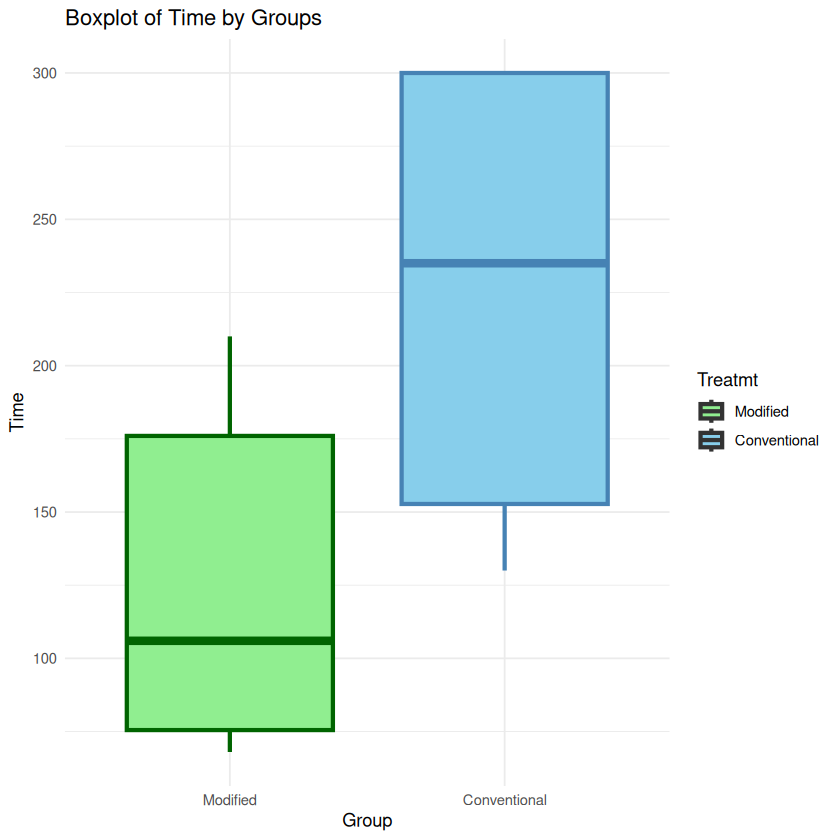

In [18]:
cat("\n")
# Function to calculate and display the 95% confidence interval for the mean
calculate_confidence_interval <- function(data, group_name) {
  # Using t.test to obtain the confidence interval
  test <- t.test(data, conf.level = 0.95)
  
  # Displaying the results    
  cat(bold("Group:", group_name))
  cat("\n")
  cat("95% Confidence Interval for the Mean:", 
      round(test$conf.int[1], 2), "-", round(test$conf.int[2], 2), "\n\n")
}

# Calculating the confidence interval for Group 1 (Modified)
calculate_confidence_interval(group1$Time, "Group 1 (Modified)")

# Calculating the confidence interval for Group 2 (Conventional)
calculate_confidence_interval(group2$Time, "Group 2 (Conventional)")

cat("\n")
# Splitting data into groups
group1 <- subset(case0402, Treatmt == "Modified")
group2 <- subset(case0402, Treatmt == "Conventional")

# Defining the value of K
K <- 19 # the day of my birthday

# Function to perform a two-sample t-test and display the results
perform_group_comparison <- function(data1, data2) {
  # Performing a two-sample t-test
  test <- t.test(data1, data2, alternative = "two.sided", var.equal = TRUE)
  
  # Displaying the results
  cat(bold("Group Comparison (Modified vs. Conventional):"))
  cat("\n")
  cat("- Null Hypothesis H0: The means of both groups are equal.\n")
  cat("- Alternative Hypothesis Ha: The means of both groups are different.\n")
  cat("- Test Statistic (t):", round(test$statistic, 3), "\n")
  cat("- P-value:", round(test$p.value, 4), "\n")
  cat("\n")

  # Decision on rejecting H0:
  cat(bold("Decision on Rejecting H0")) 
  cat("\n")
  if (test$p.value < 0.05) {
    cat("We reject H0 at the 5% significance level. The means of the groups are different.\n")
  } else {
    cat("We do not reject H0 at the 5% significance level. The means of the groups are not different.\n")
  }
  return(test)
}

# Visualization of data using boxplot with consistent colors
ggplot(case0402, aes(x = Treatmt, y = Time, fill = Treatmt)) +
  geom_boxplot(color = c("darkgreen", "steelblue"), lwd = 1.2) +  # Borders according to colors
  scale_fill_manual(values = c("Modified" = "lightgreen", "Conventional" = "skyblue")) + # Consistent fills
  labs(title = "Boxplot of Time by Groups",
       x = "Group",
       y = "Time") +
  theme_minimal()

# Performing the test for both groups
t_test_result <- perform_group_comparison(group1$Time, group2$Time)

# Practical interpretation of the results
cat("\n")

if (t_test_result$p.value < 0.05) {
  cat(bold("Interpretation:"))
  cat("\n")
  cat("At the 5% significance level, there is sufficient evidence to state that the average time values between the 'Modified' and 'Conventional' groups differ.\n")
} else {
  cat(bold("Interpretation:"))
  cat("\n")
  cat("At the 5% significance level, there is insufficient evidence to state that the average time values between the 'Modified' and 'Conventional' groups differ.\n")
}
cat("\n")
